In [30]:
import tensorflow as tf
from tensorflow import keras
from keras import layers, models
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [31]:
# (x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [32]:
dim = x_train[0].size

In [33]:
x_train = x_train.reshape((x_train.shape[0], dim)).astype("float32") / 255
x_test = x_test.reshape((x_test.shape[0], dim)).astype("float32") / 255

In [34]:
y_train = y_train.flatten()
y_test = y_test.flatten()

In [35]:
model = models.Sequential([
    layers.Dense(256, activation='relu',  input_shape=(dim,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])

C:\Users\Harshvardhan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [36]:
model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [37]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2857 - loss: 2.0048 - val_accuracy: 0.3223 - val_loss: 1.9087
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3510 - loss: 1.8371 - val_accuracy: 0.3519 - val_loss: 1.8204
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3774 - loss: 1.7723 - val_accuracy: 0.3586 - val_loss: 1.7983
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3925 - loss: 1.7257 - val_accuracy: 0.3544 - val_loss: 1.8152
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4087 - loss: 1.6882 - val_accuracy: 0.3897 - val_loss: 1.7203
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4190 - loss: 1.6552 - val_accuracy: 0.4027 - val_loss: 1.6976
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4266 - loss: 1.6286 - val_accuracy: 0.4138 - val_loss: 1.6621
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4342 - loss: 1.6054 - val_accuracy: 0.

In [38]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


313/313 - 1s - 3ms/step - accuracy: 0.4313 - loss: 1.6374
Test Accuracy: 0.4313, Test Loss: 1.6374


<Axes: >

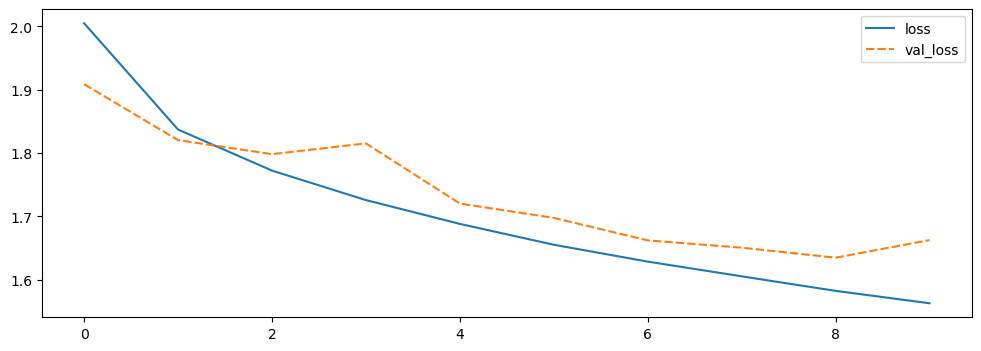

In [39]:
plt.figure(figsize=(12,4))
df = pd.DataFrame(history.history)

sns.lineplot(data=df[['loss', 'val_loss']])

<Axes: >

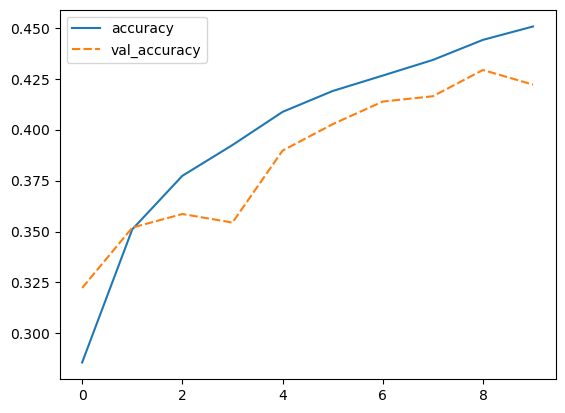

In [40]:
sns.lineplot(data=df[['accuracy', 'val_accuracy']])